這個 notebook 的資料集來自 Kaggle 上的 Speed Dating Experiment Dataset (快速配對實驗資料集)

我們可以訓練一個簡單的邏輯回歸模型（一種線性模型）

藉由觀察模型中的權重，去挖掘怎樣的「模式」

能夠更（容易/不容易）約到第二次約會

In [169]:
%matplotlib inline
import random
random.seed(10)
import numpy as np 
np.random.seed(10)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import multiprocessing
cpn_cnt = multiprocessing.cpu_count()


第一步，先觀察一下資料：

In [170]:
DATA = pd.read_csv('../input/Speed Dating Data.csv', encoding='ISO-8859-1')
DATA.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


樣本數： 8378 個人

In [171]:
# print('features: ', list(DATA))
print('samples: ', len(DATA.iloc[:,0]))

samples:  8378


In [172]:
# DATA.isnull().sum()

ID 和 IID 只是資料裡人們的編號，不是很重要

In [173]:
DATA.drop(['id', 'iid'], axis=1, inplace=True)

來統計一下成功/沒有成功配對的數量

In [174]:
pd.crosstab(DATA['match'], 'count')

col_0,count
match,
0,6998
1,1380


觀察資料中的 feature 名稱，對照敘述檔 (Speed Dating Data Key.doc) 找到我們有興趣的 feature

In [175]:
filter_1 = ['gender', 'match', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'satis_2', 'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']
DATA = DATA[filter_1]
for f in sorted(list(DATA)):
    print(f)

age
age_o
amb
amb1_1
amb1_2
amb1_3
amb1_s
amb2_1
amb2_2
amb2_3
amb3_1
amb3_2
amb3_3
amb3_s
amb4_1
amb4_2
amb4_3
amb5_1
amb5_2
amb5_3
amb7_2
amb7_3
amb_o
art
attr
attr1_1
attr1_2
attr1_3
attr1_s
attr2_1
attr2_2
attr2_3
attr3_1
attr3_2
attr3_3
attr3_s
attr4_1
attr4_2
attr4_3
attr5_1
attr5_2
attr5_3
attr7_2
attr7_3
attr_o
career
career_c
clubbing
concerts
date
date_3
dec
dec_o
dining
exercise
exphappy
expnum
fun
fun1_1
fun1_2
fun1_3
fun1_s
fun2_1
fun2_2
fun2_3
fun3_1
fun3_2
fun3_3
fun3_s
fun4_1
fun4_2
fun4_3
fun5_1
fun5_2
fun5_3
fun7_2
fun7_3
fun_o
gaming
gender
go_out
goal
hiking
imprace
imprelig
income
int_corr
intel
intel1_1
intel1_2
intel1_3
intel1_s
intel2_1
intel2_2
intel2_3
intel3_1
intel3_2
intel3_3
intel3_s
intel4_1
intel4_2
intel4_3
intel5_1
intel5_2
intel5_3
intel7_2
intel7_3
intel_o
length
like
like_o
match
match_es
met
met_o
movies
museums
music
num_in_3
numdat_2
numdat_3
pf_o_amb
pf_o_att
pf_o_fun
pf_o_int
pf_o_sha
pf_o_sin
prob
prob_o
reading
satis_2
shar
shar1_1
shar1_2
sh

觀察 prefix 重複的 feature

下面使用 corrlation matrix 來觀察 feature 間是否高度相關

若有幾種 feature 高度相關，代表 feature 間很類似

我們只留下其中一種當 feature

In [176]:
ambs = '''amb
amb1_1
amb1_2
amb1_3
amb1_s
amb2_1
amb2_2
amb2_3
amb3_1
amb3_2
amb3_3
amb3_s
amb4_1
amb4_2
amb4_3
amb5_1
amb5_2
amb5_3
amb7_2
amb7_3
amb_o'''.split()

attrs = '''attr
attr1_1
attr1_2
attr1_3
attr1_s
attr2_1
attr2_2
attr2_3
attr3_1
attr3_2
attr3_3
attr3_s
attr4_1
attr4_2
attr4_3
attr5_1
attr5_2
attr5_3
attr7_2
attr7_3
attr_o'''.split()

funs = '''fun
fun1_1
fun1_2
fun1_3
fun1_s
fun2_1
fun2_2
fun2_3
fun3_1
fun3_2
fun3_3
fun3_s
fun4_1
fun4_2
fun4_3
fun5_1
fun5_2
fun5_3
fun7_2
fun7_3
fun_o'''.split()

intels = '''intel
intel1_1
intel1_2
intel1_3
intel1_s
intel2_1
intel2_2
intel2_3
intel3_1
intel3_2
intel3_3
intel3_s
intel4_1
intel4_2
intel4_3
intel5_1
intel5_2
intel5_3
intel7_2
intel7_3
intel_o'''.split()

shars = '''shar
shar1_1
shar1_2
shar1_3
shar1_s
shar2_1
shar2_2
shar2_3
shar4_1
shar4_2
shar4_3
shar7_2
shar7_3
shar_o'''.split()

sincs = '''sinc
sinc1_1
sinc1_2
sinc1_3
sinc1_s
sinc2_1
sinc2_2
sinc2_3
sinc3_1
sinc3_2
sinc3_3
sinc3_s
sinc4_1
sinc4_2
sinc4_3
sinc5_1
sinc5_2
sinc5_3
sinc7_2
sinc7_3
sinc_o'''.split()

In [177]:
intersted_field = [ambs, attrs, funs, intels, shars, sincs]

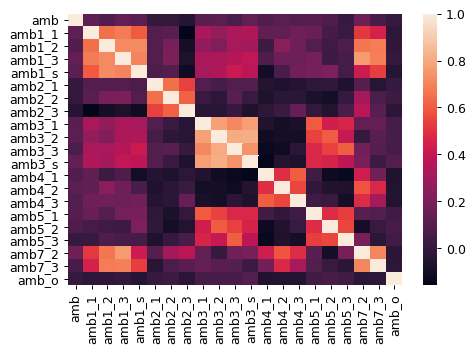

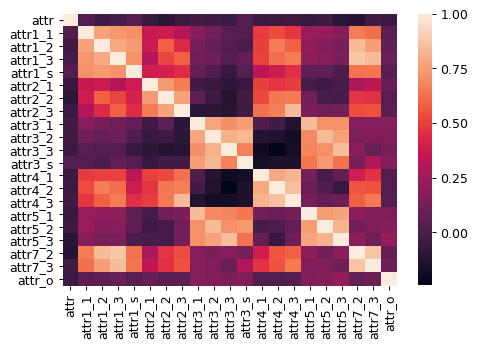

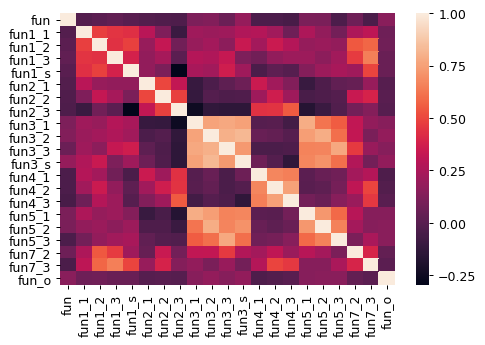

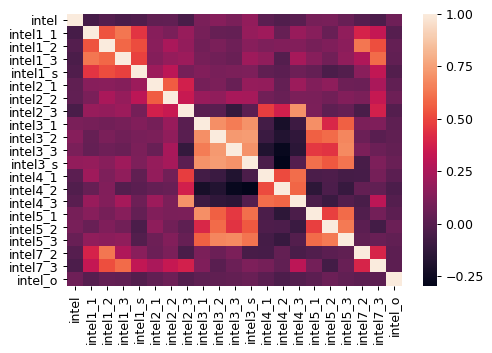

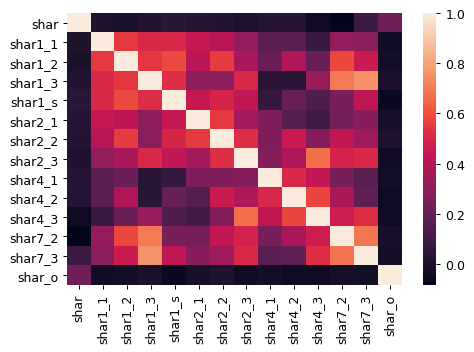

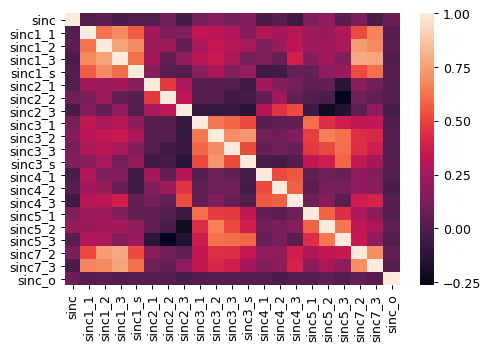

In [178]:
for f in intersted_field:
    fig, ax = plt.subplots(dpi=90)
    corr = DATA[f].corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
    plt.show()

選擇 feature

In [179]:
others = '''age
age_o
art
career_c
clubbing
concerts
date
date_3
dec
dec_o
dining
exercise
exphappy
expnum
gaming
gender
go_out
goal
hiking
imprace
imprelig
income
int_corr
length
like
like_o
match_es
met
met_o
movies
museums
music
num_in_3
numdat_2
numdat_3
pf_o_amb
pf_o_att
pf_o_fun
pf_o_int
pf_o_sha
pf_o_sin
prob
prob_o
reading
satis_2
shopping
sports
theater
them_cal
tv
tvsports
yoga
you_call'''.split()

filter_2 = ['match', 'amb', 'amb1_1', 'amb2_1', 'amb3_1', 'amb4_1', 'amb5_1', 'amb7_2', 'amb_o', 
'attr', 'attr1_1', 'attr2_1', 'attr3_1', 'attr4_1', 'attr5_1', 'attr7_2', 'attr_o',
'fun', 'fun1_1', 'fun2_1', 'fun3_1', 'fun4_1', 'fun5_1', 'fun7_2', 'fun_o',
'intel', 'intel1_1', 'intel2_1', 'intel2_3', 'intel3_1', 'intel4_1', 'intel5_1', 'intel7_2', 'intel_o',
'sinc', 'sinc1_1', 'sinc2_1', 'sinc2_3', 'sinc3_1', 'sinc4_1', 'sinc5_1', 'sinc7_2', 'sinc_o'] + shars + others

檢查、刪除缺失值

In [180]:
DATA = DATA[filter_2]
DATA.isnull().sum()

match          0
amb          712
amb1_1        99
amb2_1        89
amb3_1       105
amb4_1      1889
amb5_1      3472
amb7_2      6423
amb_o        722
attr         202
attr1_1       79
attr2_1       79
attr3_1      105
attr4_1     1889
attr5_1     3472
attr7_2     6394
attr_o       212
fun          350
fun1_1        89
fun2_1        79
fun3_1       105
fun4_1      1889
fun5_1      3472
fun7_2      6394
fun_o        360
intel        296
intel1_1      79
intel2_1      79
intel2_3    5419
intel3_1     105
            ... 
length       915
like         240
like_o       250
match_es    1173
met          375
met_o        385
movies        79
museums       79
music         79
num_in_3    7710
numdat_2     945
numdat_3    6882
pf_o_amb     107
pf_o_att      89
pf_o_fun      98
pf_o_int      89
pf_o_sha     129
pf_o_sin      89
prob         309
prob_o       318
reading       79
satis_2      915
shopping      79
sports        79
theater       79
them_cal    4404
tv            79
tvsports      

In [181]:
DATA = DATA.iloc[:, np.asarray(DATA.isnull().sum()<1000, dtype=np.bool)]
DATA.isnull().sum()

match         0
amb         712
amb1_1       99
amb2_1       89
amb3_1      105
amb_o       722
attr        202
attr1_1      79
attr2_1      79
attr3_1     105
attr_o      212
fun         350
fun1_1       89
fun2_1       79
fun3_1      105
fun_o       360
intel       296
intel1_1     79
intel2_1     79
intel3_1    105
intel_o     306
sinc        277
sinc1_1      79
sinc2_1      79
sinc3_1     105
sinc_o      287
shar1_1     121
shar1_2     915
shar2_1      89
age          95
           ... 
goal         79
hiking       79
imprace      79
imprelig     79
int_corr    158
length      915
like        240
like_o      250
met         375
met_o       385
movies       79
museums      79
music        79
numdat_2    945
pf_o_amb    107
pf_o_att     89
pf_o_fun     98
pf_o_int     89
pf_o_sha    129
pf_o_sin     89
prob        309
prob_o      318
reading      79
satis_2     915
shopping     79
sports       79
theater      79
tv           79
tvsports     79
yoga         79
Length: 74, dtype: int64

feature 與「成功配對」的相關性 (correlation)

In [182]:
# corrlations with match
corr = DATA.corrwith(DATA['match'])
corr.sort_values(ascending=False)

match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
amb         0.140042
amb_o       0.139927
satis_2     0.059370
clubbing    0.055435
fun3_1      0.051066
fun1_1      0.041652
pf_o_fun    0.041483
yoga        0.036601
attr3_1     0.036439
dining      0.033912
art         0.031545
int_corr    0.031121
exphappy    0.027880
length      0.027721
met         0.027670
              ...   
amb3_1      0.010592
exercise    0.009470
intel3_1    0.004327
theater     0.000087
amb2_1     -0.000028
gender     -0.000530
shopping   -0.001333
sinc3_1    -0.001965
amb1_1     -0.004444
tvsports   -0.004472
pf_o_amb   -0.004650
fun2_1     -0.009985
goal       -0.010306
sinc2_1    -0.014294
tv         -0.014542
career_c   -0.018112
shar1_2    -0

In [183]:
neg = np.abs(corr)<0.01
black_list = list(corr[neg].keys())
black_list

['amb1_1',
 'amb2_1',
 'fun2_1',
 'intel3_1',
 'sinc3_1',
 'exercise',
 'gender',
 'pf_o_amb',
 'shopping',
 'theater',
 'tvsports']

feature 名稱中，如果帶有 

*_o

的後綴，代表這是對方對自己的評價

而 dec_o 這一項，代表對方口頭答應下一次約會

但實際情況不太可能知道 dec_o

所以把 dec_o 刪除

另外，我們對對方的職業種類沒興趣，因為比較難量化

如果要用職業種類作為 feature 、訓練模型，

較推薦使用決策樹

In [184]:
### We don't know potential parter's decision in real world. 

black_list += ['dec_o'] 
black_list += ['career_c', 'length'] # not interested in career and length of night event

In [185]:
DATA.drop(black_list, axis=1, inplace=True)
for key, val in DATA.dtypes.items():
    print('{:>10}: {:s}'.format(str(key), str(val)))

     match: int64
       amb: float64
    amb3_1: float64
     amb_o: float64
      attr: float64
   attr1_1: float64
   attr2_1: float64
   attr3_1: float64
    attr_o: float64
       fun: float64
    fun1_1: float64
    fun3_1: float64
     fun_o: float64
     intel: float64
  intel1_1: float64
  intel2_1: float64
   intel_o: float64
      sinc: float64
   sinc1_1: float64
   sinc2_1: float64
    sinc_o: float64
   shar1_1: float64
   shar1_2: float64
   shar2_1: float64
       age: float64
     age_o: float64
       art: float64
  clubbing: float64
  concerts: float64
      date: float64
       dec: int64
    dining: float64
  exphappy: float64
    gaming: float64
    go_out: float64
      goal: float64
    hiking: float64
   imprace: float64
  imprelig: float64
  int_corr: float64
      like: float64
    like_o: float64
       met: float64
     met_o: float64
    movies: float64
   museums: float64
     music: float64
  numdat_2: float64
  pf_o_att: float64
  pf_o_fun: float64
  pf

刪除缺失值

In [186]:
DATA.dropna(inplace=True)
DATA.isnull().sum()

match       0
amb         0
amb3_1      0
amb_o       0
attr        0
attr1_1     0
attr2_1     0
attr3_1     0
attr_o      0
fun         0
fun1_1      0
fun3_1      0
fun_o       0
intel       0
intel1_1    0
intel2_1    0
intel_o     0
sinc        0
sinc1_1     0
sinc2_1     0
sinc_o      0
shar1_1     0
shar1_2     0
shar2_1     0
age         0
age_o       0
art         0
clubbing    0
concerts    0
date        0
dec         0
dining      0
exphappy    0
gaming      0
go_out      0
goal        0
hiking      0
imprace     0
imprelig    0
int_corr    0
like        0
like_o      0
met         0
met_o       0
movies      0
museums     0
music       0
numdat_2    0
pf_o_att    0
pf_o_fun    0
pf_o_int    0
pf_o_sha    0
pf_o_sin    0
prob        0
prob_o      0
reading     0
satis_2     0
sports      0
tv          0
yoga        0
dtype: int64

最後剩餘樣本數： 5567 人

In [187]:
print('samples: ', len(DATA.iloc[:,0]))

samples:  5567


做一下 ANOVA 觀察 "match" 可能受哪些因素影響

如果某變數顯著 (p<0.05)，我們在表格最右側標上 '\*' 號

In [188]:
formula = 'match ~ amb*amb_o + attr*attr_o + fun*fun_o + intel*intel_o + sinc*sinc_o + C(shar1_1) + age*age_o + clubbing + date + dining + go_out + sports + int_corr + like*like_o + met*met_o + movies + museums + music + numdat_2 + prob*prob_o + reading + satis_2 + tv + yoga + gaming + goal + C(met)*C(met_o)' # 觀察變數
lm_model = ols(formula, DATA).fit()
aov_table = sm.stats.anova_lm(lm_model, typ=2)
significat_fators = aov_table['PR(>F)']<0.05
aov_table['significant'] = np.where(significat_fators, '*', ' ')
display(aov_table)

,sum_sq,df,F,PR(>F),significant
C(shar1_1),1.648724e+01,78.0,1.974799,8.527265e-07,*
C(met),3.120994e-02,5.0,0.058317,9.977971e-01,
C(met_o),8.759002e-02,4.0,0.204580,9.359629e-01,
C(met):C(met_o),2.254475e+00,20.0,1.053137,3.937945e-01,
amb,7.901104e-01,1.0,7.381716,6.609895e-03,*
amb_o,1.030364e+00,1.0,9.626321,1.927926e-03,*
amb:amb_o,1.674745e-01,1.0,1.564654,2.110389e-01,
attr,4.922861e+00,1.0,45.992509,1.313124e-11,*
attr_o,4.973575e+00,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976e+00,1.0,46.442035,1.045933e-11,*


下面的表格只列出顯著的變數

In [189]:
display(aov_table[significat_fators]) # 

,sum_sq,df,F,PR(>F),significant
C(shar1_1),16.487237,78.0,1.974799,8.527265e-07,*
amb,0.790110,1.0,7.381716,6.609895e-03,*
amb_o,1.030364,1.0,9.626321,1.927926e-03,*
attr,4.922861,1.0,45.992509,1.313124e-11,*
attr_o,4.973575,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976,1.0,46.442035,1.045933e-11,*
fun,1.169900,1.0,10.929955,9.523565e-04,*
fun_o,1.340485,1.0,12.523667,4.051893e-04,*
sinc,0.566476,1.0,5.292377,2.145665e-02,*
sinc_o,0.499662,1.0,4.668163,3.077034e-02,*


從上述表格可以看出：

1. 有共同愛好
2. 自己有企圖心 / 對方認為你有企圖心
3. 自己覺得自己有吸引力 / 對方覺得你對他來說有吸引力
4. 自己覺得自己是有趣的人 / 對方覺得你是有趣的人
5. 自己覺得自己很真誠 / 對方覺得你很真誠
6. 自己有參與社團的興趣
7. 自己有運動的興趣
8. 你喜歡他 / 他喜歡你
9. 你覺得"有機會" / 他覺得"有機會"
10. 你對這次約會的在意程度

這幾個因素有可能跟最後配對(match)成功/失敗有關係

但是其中有幾項由於變數間交互作用對影響 match 是顯著的，例如：

1. 自己覺得自己有吸引力 * 對方覺得你對他來說有吸引力
2. 你喜歡他 * 他喜歡你
3. 你覺得"有戲" * 他覺得"有戲"

這些變數的交互作用可能影響 match 結果顯著，所以這些變數不能單獨拆開來看，要考慮到變數間的交互作用對最後 match 的影響。

最後要強調，"顯著" 並不代表一定對 "match" 有影響，
就算有影響，也看不出是好是壞。接下來我們訓練一個簡單的邏輯回歸模型，看看有哪些因素 "可能" 對 "match" 有正向/負面影響。


In [190]:
X, Y = np.array(DATA.iloc[:, 1:], dtype=np.float32), np.array(DATA.iloc[:, 0], dtype=np.int16)
print(X.shape)
print(Y.shape)

(5567, 59)
(5567,)


模型訓練

In [191]:
random.seed(10) # 固定變數，讓結果可以重現
np.random.seed(10)

In [192]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from IPython.display import display

In [193]:
parameters = {'C': [0.1, 1, 10], 'max_iter': [500, 1000], 'solver': ['lbfgs', 'liblinear']}

In [194]:
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y)
print('{:d} samples for train/val, {:d} samples for testing.'.format(len(X), len(X_test)))

lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=10, scoring='accuracy', n_jobs=max(1, cpn_cnt-1))
lr.fit(X, Y)
display(lr.cv_results_)

4453 samples for train/val, 1114 samples for testing.


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([2.08567007, 0.35283561, 3.1330956 , 0.34394712, 2.16277592,
        0.58500667, 3.77737489, 0.60302997, 2.0431416 , 0.81623163,
        3.92368679, 0.90649283]),
 'std_fit_time': array([0.14446143, 0.07318189, 0.53513985, 0.06805478, 0.13544995,
        0.20414753, 0.46090456, 0.13286121, 0.18306196, 0.14947142,
        0.25726827, 0.2525094 ]),
 'mean_score_time': array([0.00521944, 0.01101992, 0.00415404, 0.01414697, 0.00306528,
        0.01185985, 0.0045378 , 0.01947017, 0.00460277, 0.006971  ,
        0.0046212 , 0.01740751]),
 'std_score_time': array([0.00225066, 0.00646926, 0.0026124 , 0.0084215 , 0.00273361,
        0.00689473, 0.00338669, 0.01455567, 0.00258521, 0.00852166,
        0.00259227, 0.01211054]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=ob

In [195]:
display(lr.best_params_)

{'C': 1, 'max_iter': 500, 'solver': 'liblinear'}

In [196]:
print('Testing set performance: ')
preds = lr.predict(X_test) # prediction
acc = accuracy_score(Y_test, preds) # evaluations
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)
f1 = f1_score(Y_test, preds)
print('acc: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1: {:.2f}'.format(acc, precision, recall, f1))

Testing set performance: 
acc: 0.90, precision: 0.72, recall: 0.70, f1: 0.71


底下印出模型權重

模型權重預高，代表對應的 feature 愈能句提高成功配對的機率

反之權重愈低的 feature 愈降低成功配對的機率

In [197]:
best_lr = lr.best_estimator_
W_inspect = np.append(best_lr.coef_.flatten(), best_lr.intercept_.flatten(), axis=-1) # Check weights of perceptron to acquire knowledge of dating? ;)
features_key = np.array(list(DATA.iloc[:, 1:]) + ['w0 (+1)'])
order = np.argsort(-W_inspect)
weights, keys = W_inspect[order], features_key[order]
for w, k in zip(weights, keys):
    print('{:>10}: {:.4f}'.format(k, w))

       dec: 6.5756
    like_o: 0.5115
    attr_o: 0.4327
    prob_o: 0.1707
  int_corr: 0.1472
      prob: 0.1415
     fun_o: 0.1368
       art: 0.0612
    fun3_1: 0.0529
     intel: 0.0452
    hiking: 0.0357
        tv: 0.0342
      sinc: 0.0245
   intel_o: 0.0224
  exphappy: 0.0132
       fun: 0.0128
  pf_o_int: 0.0126
   attr2_1: 0.0075
   sinc2_1: 0.0032
  pf_o_sha: 0.0032
  pf_o_fun: 0.0019
      yoga: 0.0007
  imprelig: -0.0034
   shar2_1: -0.0040
  clubbing: -0.0058
   reading: -0.0060
      like: -0.0066
   shar1_2: -0.0082
  pf_o_sin: -0.0091
  intel2_1: -0.0093
     music: -0.0112
  pf_o_att: -0.0132
       amb: -0.0160
    sports: -0.0209
    go_out: -0.0210
  intel1_1: -0.0219
       met: -0.0239
   museums: -0.0320
   imprace: -0.0323
    dining: -0.0364
    fun1_1: -0.0368
   attr1_1: -0.0369
  concerts: -0.0393
     age_o: -0.0433
       age: -0.0441
      goal: -0.0447
    movies: -0.0457
    gaming: -0.0474
   shar1_1: -0.0498
   sinc1_1: -0.0543
    amb3_1: -0.0796
  

觀察資料，最高權重的幾個 feature 為：

1. dec: 自己想約下一次
2. like_o: 對方喜歡自己
3. attr_o: 對方覺得自己很有魅力
4. prob_o: 對方覺得 "有機會"
5. int_corr: 雙方興趣相近
6. prob: 自己覺得 "有機會"
7. fun_o: 對方覺得自己有趣
8. art: 自己喜歡藝術類的東西
9. intel: 自己覺得自己聰明
10. hiking: 喜歡爬山
11. tv: 喜歡看電視
12. sinc: 自己態度很真誠
13. intel_o: 對方覺得自己聰明

...

權重最低、而且是負的幾個 feature:

1. met_o: 對方在約會前認識你（驚）
2. amb_o: 對方覺得你很有野心
3. sinc_o: 對方覺得你很真誠（驚）
4. attr: 自己覺得自己很有魅力（驚）
5. numdat_2: 參加 "快速配對" 類活動的次數
6. date: 愈高代表平常約會頻率預低（換句話說：平常沒有約會的人，比較難成功約到下一次約會）
7. satis_2: 你對於這次約會對象多滿意
8. shar1_1: 有共同愛好
9. gaming: 喜歡打遊戲
10. movies: 喜歡看電影
11. goal: 愈高代表對這次約會的結果愈認真、愈在意
12. age: 年齡
13. age_o: 對方年齡

...

跑出來的結果非常有趣，之後也許可以嘗試決策樹

就不會受限於線性模型這樣類似加減分的性質

也可以更好地觀察潛在的模式